# Roche Data Science - Home Study Case

By: Johnny Sin
Date: July 7-10, 2023

# Outline of the Project

## 1. Project Information
Scenario: Working as a Data Scientist and asked by Digital Transformation Managing Partner Simon to start a project that uses data collected on stroke patients over the past few years.

**About this Company:**
* Mission: developing innovative treatments for stroke, with an average of 11K patients helped annually.

## 2. Describing the data providing

Feature Information:
1. ID: Unique Identification Number
2. Gender: Male / Female / Other (Categorical Variable)
3. Age_In_Days: Indicates patient's age in days (numerical variable)
4. Hypertension: 1 - has hypertension | 0 - no hypertension (binomial variable)
5. Heart_Disease: 1 - has heart disease | 0 - no heart disease (binomial variable)
6. Ever_married: Yes - patient is / was ever married | No - patient has never been married (binomial variable)
7. Type_Of_Work: working status, 'self-employed', 'works in private firm', 'government job', 'still a child' (categorical variable)
8. Residence: Urban - patient currently lives in urban | Rural - patient lives in rural area (binomial variable)
9. Avg_Glucose: patient's average glucose level for the past 3 months
10. BMI: patient's current BMI score
11. Smoking_Status: indication of smoking habits (categorical variable)
12. **TARGET** Stroke: 1 - patient after stroke | 0 - no stroke (binomial variable)

Already looking at the features of the dataset, I will be using various classification algorithms for this project

## 3. Exploratory Data / Statistical Analysis

Here I will be looking at the various data descriptions and also feature engineering, along with figuring out the autocorrelative/multicollinearity of the features. 

### 3. 1 First importing the libraries / tools

In [13]:
# importing the necessary libraries and tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
%matplotlib inline

# importing the scikit-learn tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# importing the estimators to test
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# importing the sklearn metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.metrics import f1_score, recall_score, precision_score

In [7]:
# importing the dataset
pd.set_option('display.max_columns', None)

df_main = pd.read_csv('Stroke_Prediction.csv', low_memory=False)
df_main.head()

,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,57008,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46657,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [9]:
# creating a copy of the original data for our working dataset
df = df_main.copy()

# looking at the features in single view
df.head().T

,0,1,2,3,4
ID,31153,30650,17412,57008,46657
Gender,Male,Male,Female,Female,Male
Age_In_Days,1104.0,21204.0,2928.0,25578.0,5128.0
Hypertension,0,1,0,0,0
Heart_Disease,0,0,0,0,0
Ever_Married,No,Yes,No,Yes,No
Type_Of_Work,children,Private,Private,Private,Never_worked
Residence,Rural,Urban,Urban,Rural,Rural
Avg_Glucose,95.12,87.96,110.89,69.04,161.28
BMI,18.0,39.2,17.6,35.9,19.1


### 3.2 Checking out the data information and more details

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              43400 non-null  int64  
 1   Gender          43400 non-null  object 
 2   Age_In_Days     43400 non-null  float64
 3   Hypertension    43400 non-null  int64  
 4   Heart_Disease   43400 non-null  int64  
 5   Ever_Married    43400 non-null  object 
 6   Type_Of_Work    43400 non-null  object 
 7   Residence       43400 non-null  object 
 8   Avg_Glucose     43400 non-null  float64
 9   BMI             41938 non-null  float64
 10  Smoking_Status  30108 non-null  object 
 11  Stroke          43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [11]:
df.describe()

,ID,Age_In_Days,Hypertension,Heart_Disease,Avg_Glucose,BMI,Stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36875.482604,15446.234931,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.890037,8334.882942,0.291235,0.212733,43.111751,7.770020,0.133103
min,176.000000,-16381.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18594.250000,8789.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36908.000000,16074.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,55054.250000,21923.250000,0.000000,0.000000,112.070000,32.900000,0.000000
max,73899.000000,264301.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [12]:
df.shape

(43400, 12)

Since we have less than 100K samples, for this study we will not be using SGD or Kernel approximation estimators

In [17]:
# Creating a categorical features list
cat_features = []
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        cat_features.append(label)
    
# creating a numerical features list
float_features = []
for label, content in df.items():
    if pd.api.types.is_float_dtype(content):
        float_features.append(label)
        
# creating a features list for already encoded features
int_features = []
for label, content in df.items():
    if pd.api.types.is_int64_dtype(content):
        int_features.append(label)

In [20]:
print(f' Categorical features are: {cat_features}, \n Numerical features are {float_features}, \n Encoded features are {int_features}')

 Categorical features are: ['Gender', 'Ever_Married', 'Type_Of_Work', 'Residence', 'Smoking_Status'], 
 Numerical features are ['Age_In_Days', 'Avg_Glucose', 'BMI'], 
 Encoded features are ['ID', 'Hypertension', 'Heart_Disease', 'Stroke']


### 3.3 Encoding the categorical features into Int64 values

In [24]:
for columns in cat_features:
    print(df[columns].value_counts(), '\n')

Gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64 

Ever_Married
Yes    27938
No     15462
Name: count, dtype: int64 

Type_Of_Work
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64 

Residence
Urban    21756
Rural    21644
Name: count, dtype: int64 

Smoking_Status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64 



In [245]:
# Manually Encoding features for visualization
df_tmp = df.copy()

# Encoding the Gender Column
df_tmp['Gender'] = df_tmp['Gender'].map({'Female': 0,
                                'Male': 1,
                                'Other': 2})
# Encoding the Ever_Married Column
df_tmp['Ever_Married'] = df_tmp['Ever_Married'].map({'Yes': 0,
                                                    'No': 1})
# Encoding the Type_Of_Work Column
df_tmp['Type_Of_Work'] = df_tmp['Type_Of_Work'].map({'Private': 0,
                                                    'Self-employed': 1,
                                                    'children': 2,
                                                    'Govt_job': 3,
                                                    'Never_worked': 4})
# Encoding the Residence Column
df_tmp['Residence'] = df_tmp['Residence'].map({'Urban': 0,
                                              'Rural': 1})
# Encoding the Smoking_Status Column
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].map({'never smoked': 0,
                                                        'formerly smoked': 1,
                                                        'smokes': 2})

## I will be dropping the ID column because it is irrelevant:
df_tmp.drop('ID', axis = 1, inplace = True)

## I will also be replacing the 'Stroke' column name with 'Target'
df_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)

In [246]:
df_tmp.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
0,1,1104.0,0,0,1,2,1,95.12,18.0,NaN,0
1,1,21204.0,1,0,0,0,0,87.96,39.2,0.0,0
2,0,2928.0,0,0,1,0,0,110.89,17.6,NaN,0
3,0,25578.0,0,0,0,0,1,69.04,35.9,1.0,0
4,1,5128.0,0,0,1,4,1,161.28,19.1,NaN,0


### 3.4 Checking for Null Values

In [247]:
df_tmp.isna().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                1462
Smoking_Status    13292
Target                0
dtype: int64

In [248]:
df_tmp.isna().sum() / len(df_tmp)

Gender            0.000000
Age_In_Days       0.000000
Hypertension      0.000000
Heart_Disease     0.000000
Ever_Married      0.000000
Type_Of_Work      0.000000
Residence         0.000000
Avg_Glucose       0.000000
BMI               0.033687
Smoking_Status    0.306267
Target            0.000000
dtype: float64

Because almost 30 percent of the data is missing for the Smoking_status we can either:
1. impute the missing values with the mode
2. exclude the samples with missing values
3. **create a third category called "unknown"** 
Because the first two methods are rather extreme, we will choose the third method

*For the BMI we can simply exclude the samples without BMI recording, since only 3 percent of the samples have missing data*


In [249]:
# dropping the missing values
df_tmp.dropna(subset=['BMI'], inplace = True)
df_tmp.isna().sum()

Gender                0
Age_In_Days           0
Hypertension          0
Heart_Disease         0
Ever_Married          0
Type_Of_Work          0
Residence             0
Avg_Glucose           0
BMI                   0
Smoking_Status    12866
Target                0
dtype: int64

In [250]:
# creating a new column for the Smoking_Status missing values column:
df_tmp['Smoking_Status'] = df_tmp['Smoking_Status'].fillna(3)
df_tmp['Smoking_Status'].value_counts()

Smoking_Status
0.0    15747
3.0    12866
1.0     7099
2.0     6226
Name: count, dtype: int64

In [251]:
print(f'The current dataframe is now: {len(df_tmp) / len(df_main) *100:.2f}% of the original dataframe')

The current dataframe is now: 96.63% of the original dataframe


### 3.5 Data visualization
Now that we imputed the missing values, encoded the categorical features, and created a new dataframe `df_dropped` we can start finding correlations between the features

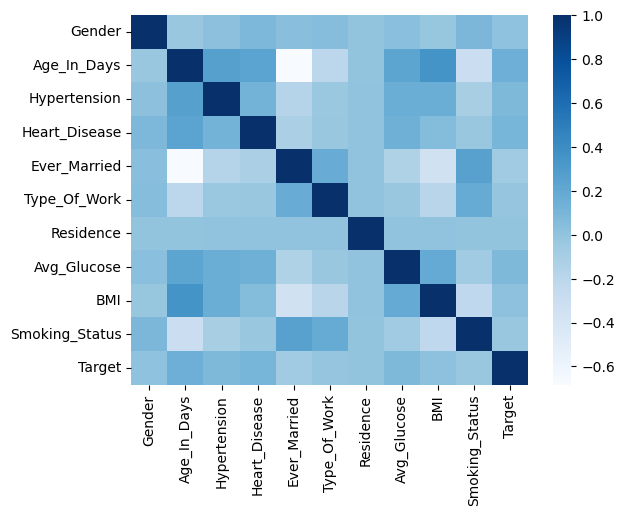

In [252]:
# Creating a correlation matrix
corr_matrix = df_tmp.corr()
corr_plot = sns.heatmap(corr_matrix,
                        annot = False,
                       cmap = 'Blues')
corr_plot;

In [253]:
# creating a correlation matrix using the dataframe to see the coefficients annotated
corr_pd = corr_matrix.style.background_gradient(cmap = 'Blues')
corr_pd

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
Gender,1.000000,-0.031164,0.021353,0.080076,0.034772,0.046757,-0.002894,0.031903,-0.021981,0.089688,0.010015
Age_In_Days,-0.031164,1.000000,0.264162,0.239200,-0.682833,-0.206336,-0.000866,0.228067,0.353383,-0.303425,0.145440
Hypertension,0.021353,0.264162,1.000000,0.120806,-0.173041,-0.035075,0.001192,0.159130,0.161225,-0.103855,0.079479
Heart_Disease,0.080076,0.239200,0.120806,1.000000,-0.123489,-0.026938,0.004111,0.143555,0.057677,-0.026426,0.111102
Ever_Married,0.034772,-0.682833,-0.173041,-0.123489,1.000000,0.177889,0.004829,-0.148817,-0.342281,0.257022,-0.066794
Type_Of_Work,0.046757,-0.206336,-0.035075,-0.026938,0.177889,1.000000,0.004746,-0.027594,-0.183896,0.182125,-0.017008
Residence,-0.002894,-0.000866,0.001192,0.004111,0.004829,0.004746,1.000000,0.001154,0.003749,0.000303,-0.002315
Avg_Glucose,0.031903,0.228067,0.159130,0.143555,-0.148817,-0.027594,0.001154,1.000000,0.191295,-0.071360,0.077227
BMI,-0.021981,0.353383,0.161225,0.057677,-0.342281,-0.183896,0.003749,0.191295,1.000000,-0.229165,0.020285
Smoking_Status,0.089688,-0.303425,-0.103855,-0.026426,0.257022,0.182125,0.000303,-0.071360,-0.229165,1.000000,-0.031059


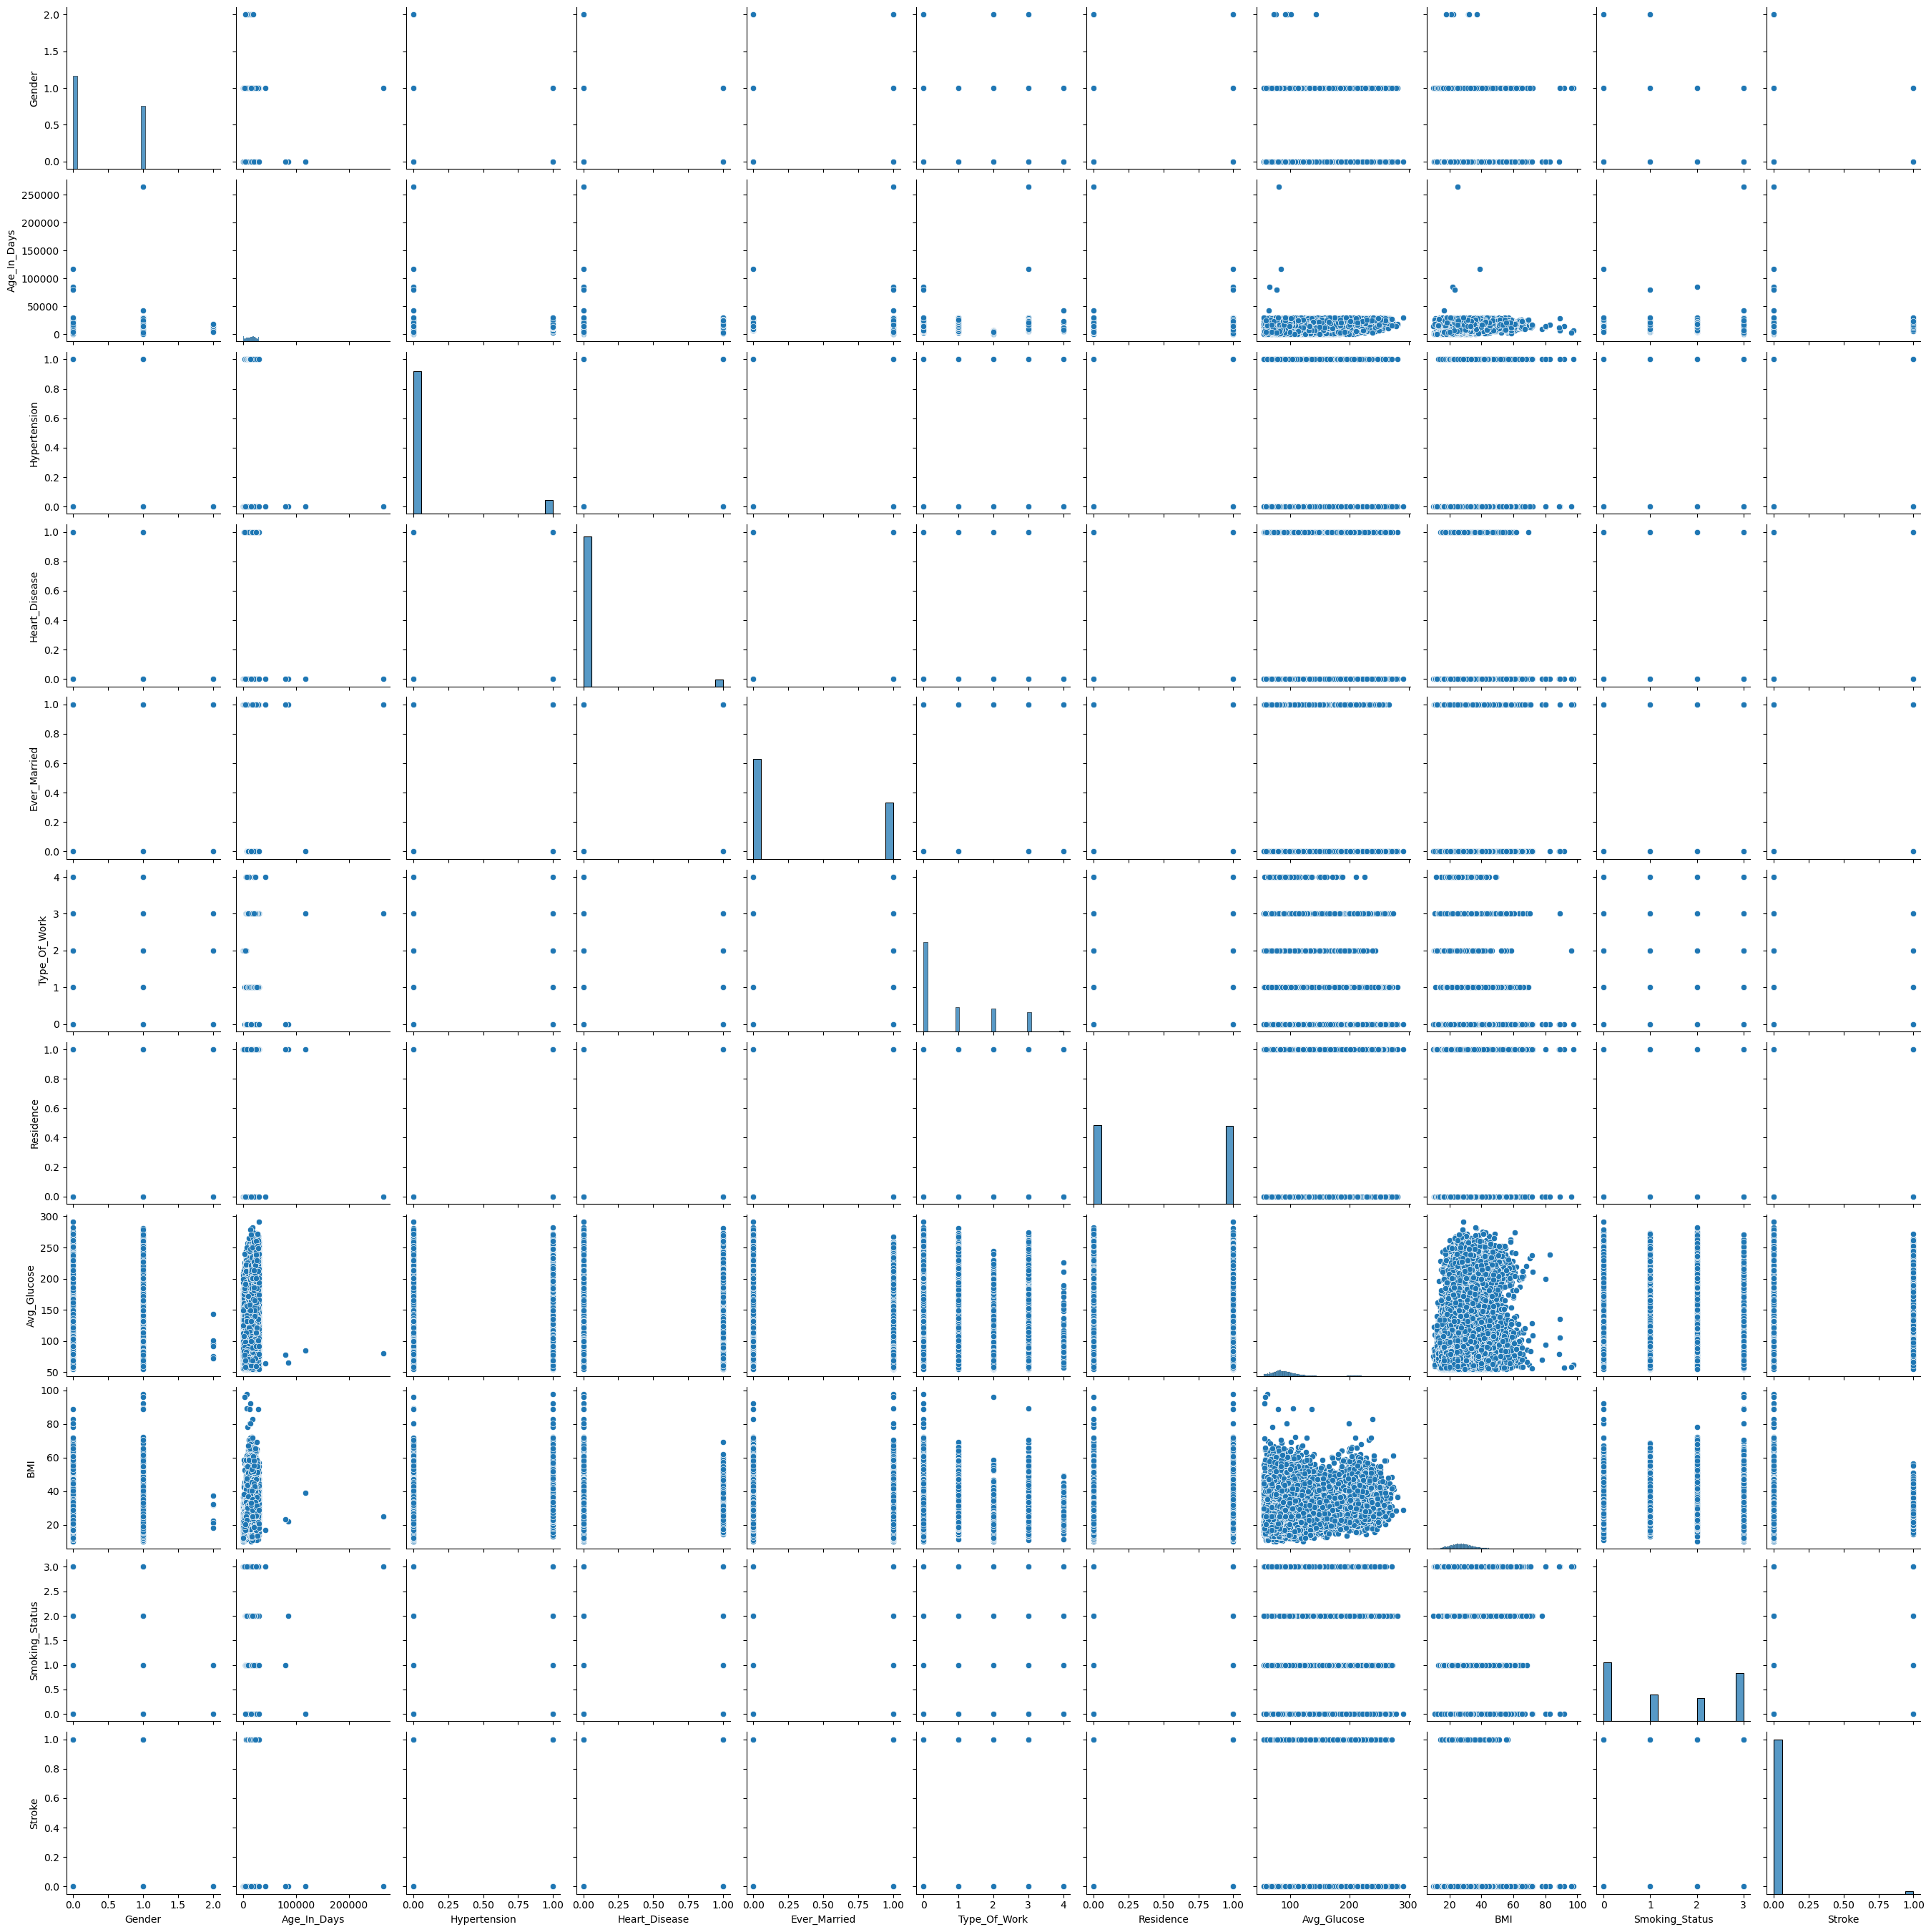

In [112]:
# for more detailed information, I will create a pairplot to visualize all the relationships
sns.pairplot(df_tmp);

Seeing how maybe Hypertension and Heart Disease might be correlated, I'll look more into this

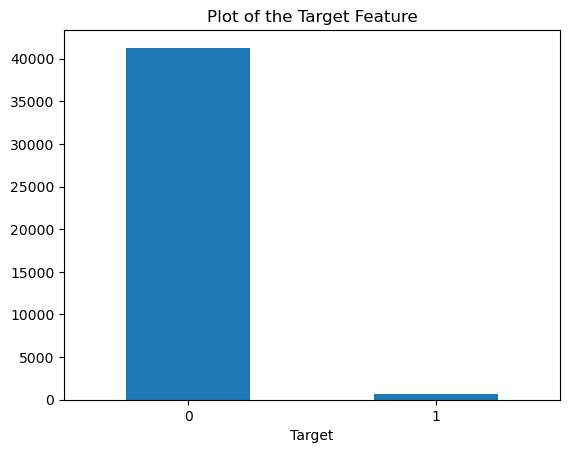

In [254]:
# visualizing the Target Column:
df_tmp['Target'].value_counts().plot(kind = 'bar')
plt.title('Plot of the Target Feature')
plt.xticks(rotation = 0);

In [255]:
# getting the value counts for the target feature
df_tmp.Target.value_counts()

Target
0    41295
1      643
Name: count, dtype: int64

In [256]:
# creating a function for visualizing all the value counts:
def plot_features_value_counts(data, target_column = 'Target'):
    '''
    A function displays the value counts of every feature (10 columns) excluding the target
    '''
    # selecting only the dependent features
    data_X = data.drop(target_column, axis = 1)
    
    # setting up the figure
    fig = plt.figure(figsize = (20,10))
    # looping through 10 (for displaying 10 figures)
    for i, columns in enumerate(list(data_X.columns)):
        # create subplots (5 per row)
        ax = plt.subplot(2, 5, i+1)
        
        # Display the plot
        if pd.api.types.is_float_dtype(data_X[columns]):
            data_X[columns].plot.hist()
            plt.title(f'Histogram: {columns}')
        else:
            data_X[columns].value_counts().plot(kind='bar')
            plt.title(f'Value Counts: {columns}')
        
    fig.suptitle('Comprehensive Features Plot')          

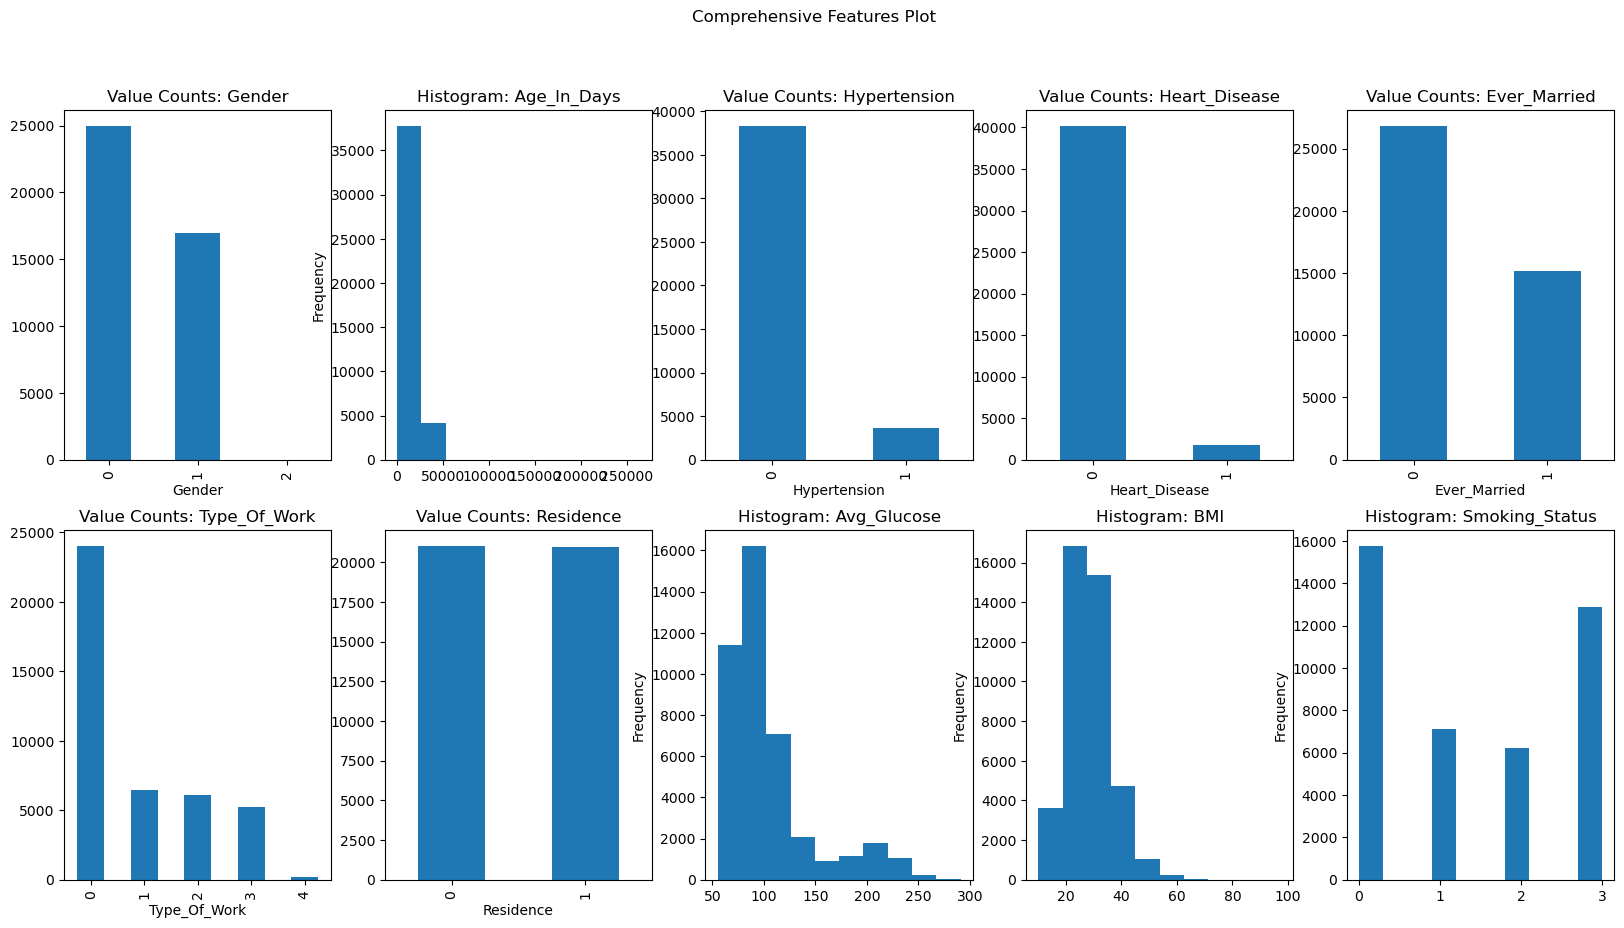

In [150]:
plot_features_value_counts(df_tmp)

### 3.5.1 Looking at the plots above, the histogram for the `Age_In_Days` seem to be a little weird. I will be investigating this feature for possible outlier removal

In [257]:
# more information about this column
df_tmp['Age_In_Days'].describe()

count     41938.000000
mean      15309.276131
std        8324.684852
min          30.200000
25%        8771.000000
50%       15733.000000
75%       21583.000000
max      264301.000000
Name: Age_In_Days, dtype: float64

In [258]:
print(f"Average Age of Samples in Years: {(np.mean(df_tmp['Age_In_Days']))/365} years", "\n",
     f"The Max Age is: {np.max(df_tmp['Age_In_Days'])/365} years", "\n",
     f"The Min Age is: {np.min(df_tmp['Age_In_Days'])/365} years")

Average Age of Samples in Years: 41.943222277896204 years 
 The Max Age is: 724.1123287671232 years 
 The Min Age is: 0.08273972602739726 years


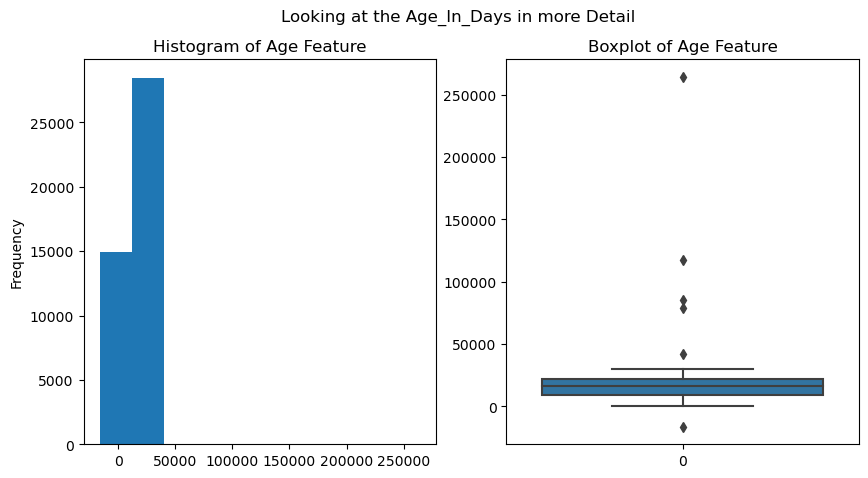

In [259]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

We will be using the Tukey's rule to remove outliers in the `Age_In_Days` column. Which is simply calculating the upper boundary as $$ Q3 + 1.5 IQR $$ and lower boundary as $$ Q1 - 1.5IQR$$ where the $ IQR = Q3 - Q1 $



In [260]:
# function for calculating the IQR:
def getting_IQR(series):
    '''
    Using the input pd.Series to output the IQR, and the upper_lim, lower_lim
    '''
    Q3 = series.quantile(0.75)
    Q1 = series.quantile(0.25)
    
    IQR = Q3 - Q1
    
    #lower boundary
    lower_lim = Q1 - (1.5 * IQR)
    
    # upper boundary
    upper_lim = Q3 + (1.5 * IQR)
    print(f'IQR = {IQR}, lower lim = {lower_lim}, upper_lim = {upper_lim}')
    
    return IQR, upper_lim, lower_lim    

In [261]:
IQR, upper_lim, lower_lim = getting_IQR(df['Age_In_Days'])

IQR = 13134.25, lower lim = -10912.375, upper_lim = 41624.625


In [270]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
1342,0,85451.0,0,0,1,0,1,65.30,22.1,2.0,0
3786,1,42349.0,0,0,1,4,0,64.29,16.7,3.0,0
8155,1,264301.0,0,0,1,3,0,80.31,25.0,3.0,0
18177,0,117179.0,0,0,0,3,1,84.39,38.9,0.0,0
26716,0,79231.0,0,0,1,0,1,77.62,23.1,1.0,0


Because these Age values do not make sense, we will consider them as outliers and remove them

In [271]:
df_tmp[df_tmp['Age_In_Days'] < lower_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


In [272]:
df_tmp.drop(labels = list(df_tmp[df_tmp['Age_In_Days'] > upper_lim].index), axis = 0, inplace = True)

In [273]:
df_tmp[df_tmp['Age_In_Days'] > upper_lim]

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target


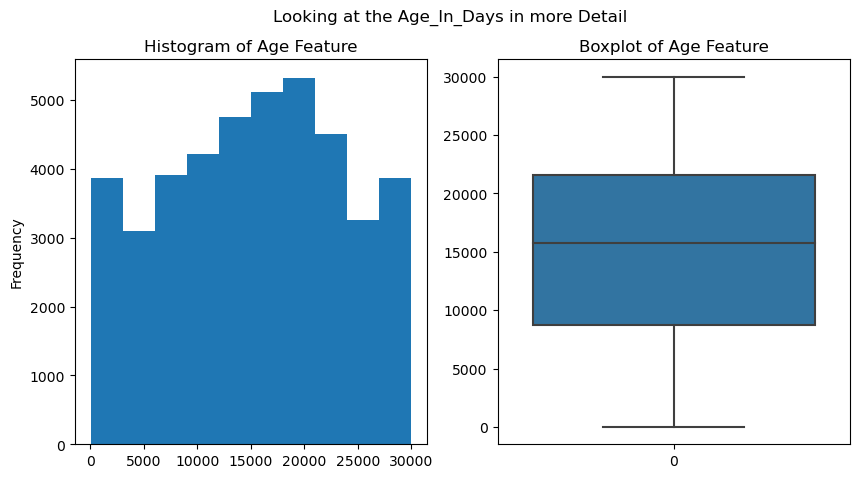

In [274]:
# looking at the histogram and boxplot a bit more closely
fig = plt.figure(figsize = (10,5))

# histogram subplot
ax = plt.subplot(1, 2, 1)
df_tmp['Age_In_Days'].plot.hist()
plt.title('Histogram of Age Feature')

# boxplot subplot
ax = plt.subplot(1, 2, 2)
sns.boxplot(df_tmp['Age_In_Days'])
plt.title('Boxplot of Age Feature')

fig.suptitle('Looking at the Age_In_Days in more Detail');

In [218]:
print(f'we have now a total of {len(df_tmp) / len(df) *100:.2f}% of data to work with!')

we have now a total of 96.62% of data to work with!


Now that we removed the outliers for the `Age_In_Days` column we can proceed with our analysis!

### 3.5.2 Looking at the numerical features and their relationship / correlation

In [238]:
# testing for feature variability
corr_y = df_tmp['Age_In_Days'][:2000]
corr_x = df_tmp['Avg_Glucose'][:2000]

x_stat = sm.add_constant(corr_x)
results = sm.OLS(corr_y, x_stat).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Age_In_Days   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     96.27
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.16e-22
Time:                        16:12:55   Log-Likelihood:                -20791.
No. Observations:                2000   AIC:                         4.159e+04
Df Residuals:                    1998   BIC:                         4.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.133e+04    457.872     24.746      0.000    1.04e+04    1.22e+04
Avg_Glucose    39.0720      3.982      9.812      0.000      31.262      46.882
==============================================================================
Omnibus:                      199.773   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.698
Skew:                          -0.085   Prob(JB):                     6.60e-14
Kurtosis:                       2.163   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
y_hat = results.params[0] + results.params[1]*corr_x

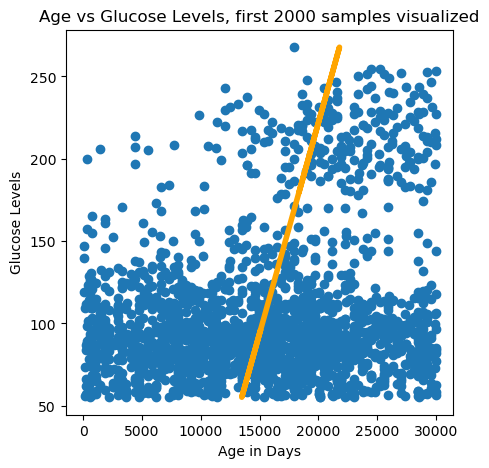

In [239]:
# plotting Age_In_days vs Avg_Glucose
fig, ax = plt.subplots(figsize=(5,5))
ax = plt.scatter(corr_y, corr_x)
fig = plt.plot(y_hat, corr_x, lw = 4, c = 'orange', label = 'regression line')
plt.title('Age vs Glucose Levels, first 2000 samples visualized')
plt.xlabel('Age in Days')
plt.ylabel('Glucose Levels')
plt.xticks(rotation=0)
plt.show();


## 4. Finding the best estimator

For this case study we will be looking at these models:
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier
4. SVC
5. LinearSVC

### 4.1 Getting our Data Ready for Modeling
Creating a preprocessing and encoding pipeline just like we did with `df_tmp`

In [284]:
# creating a function that will organize our data and remove outliers 
# so that it will be ready for modeling
def preparing_data(data):
    '''
    This function will do a couple things: 
    1) Remove the 'BMI' column's missing values
    2) Drop the ID column
    3) Replacing the 'Stroke' colum name with 'Target'
    4) Remove the outlier rows in the 'Avg_Glucose'
    5) Create a new category in 'Smoking_Status' to include a 'Missing' value
    '''
    # creating a copy of the data
    data_tmp = data.copy()
    
    # 1. removing the 'BMI' missing values
    print(f"removing BMI missing values, total of {data_tmp['BMI'].isna().sum()}...")
    data_tmp.dropna(subset=['BMI'], inplace = True)
    
    ## 2. I will be dropping the ID column because it is irrelevant:
    print('Dropping the ID column...')
    data_tmp.drop('ID', axis = 1, inplace = True)
       
    ## 3. I will also be replacing the 'Stroke' column name with 'Target'
    print('Renaming the target column...')
    data_tmp.rename({'Stroke': 'Target'}, axis = 1, inplace = True)
          
    ## 4. Removing the outliers from the Age_In_Days column
    print('detecting outliers...')
    IQR, upper_lim, lower_lim = getting_IQR(data_tmp['Age_In_Days'])
    
    outlier_index = list(data_tmp[data_tmp['Age_In_Days'] > upper_lim].index)
    data_tmp.drop(labels =  outlier_index, inplace = True, axis = 0) 
    
    # 5. Encoding the Smoking_Status Column
    print('filling in the smoking status missing values...')
    data_tmp['Smoking_Status'] = data_tmp['Smoking_Status'].fillna('Missing')
          
    return data_tmp   

In [285]:
df_model = preparing_data(df)

removing BMI missing values, total of 1462...
Dropping the ID column...
Renaming the target column...
detecting outliers...
IQR = 12812.0, lower lim = -10447.0, upper_lim = 40801.0
filling in the smoking status missing values...


In [286]:
df_model.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Target
0,Male,1104.0,0,0,No,children,Rural,95.12,18.0,Missing,0
1,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,Missing,0
3,Female,25578.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,5128.0,0,0,No,Never_worked,Rural,161.28,19.1,Missing,0


In [287]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41933 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          41933 non-null  object 
 1   Age_In_Days     41933 non-null  float64
 2   Hypertension    41933 non-null  int64  
 3   Heart_Disease   41933 non-null  int64  
 4   Ever_Married    41933 non-null  object 
 5   Type_Of_Work    41933 non-null  object 
 6   Residence       41933 non-null  object 
 7   Avg_Glucose     41933 non-null  float64
 8   BMI             41933 non-null  float64
 9   Smoking_Status  41933 non-null  object 
 10  Target          41933 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.8+ MB


In [288]:
df_model.isna().sum()

Gender            0
Age_In_Days       0
Hypertension      0
Heart_Disease     0
Ever_Married      0
Type_Of_Work      0
Residence         0
Avg_Glucose       0
BMI               0
Smoking_Status    0
Target            0
dtype: int64

Looks like the `preparing_data` function worked! The missing value are taken care of and the column names are changed accordingly

### 4.2 Splitting our dataset into Training and Testing 

In [291]:
# creating a new X and y dataset 
X = df_model.drop('Target', axis = 1)
y = df_model['Target']

# splitting the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33546, 10), (8387, 10), (33546,), (8387,))

In [292]:
X_train.head()

,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status
15772,Male,1131.0,0,0,No,children,Urban,95.62,18.5,Missing
41811,Male,14608.0,0,0,Yes,Private,Urban,124.85,24.1,smokes
40080,Female,24833.0,1,0,Yes,Self-employed,Rural,115.68,28.7,formerly smoked
9011,Female,24482.0,0,0,Yes,Private,Urban,64.69,40.2,smokes
8188,Male,29938.0,0,0,No,Private,Urban,85.29,28.3,formerly smoked


In [295]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: Target, Length: 41933, dtype: int64

looks like our data splitting worked! 

### 4.3 Creating our Pipeline

Here I will be creating a modeling Pipeline with a ColumnTransformer to impute and encode the dataframe. 


## 5. Hyperparameter Tuning

## 6. Feature Importance and Summary